# Random Forest

## Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df1 = pd.read_excel(r"C:\Users\Dell\Downloads\glass.xlsx")

df1.head()

Prepare a model for glass classification using Random Forest
0                                  Data Description:          
1                              RI : refractive index          
2  Na: Sodium (unit measurement: weight percent i...          
3                                      Mg: Magnesium          
4                                       AI: Aluminum

In [2]:
df = pd.read_excel(r"C:\Users\Dell\Downloads\glass.xlsx", sheet_name = 1)

In [3]:
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [4]:
df.shape

(214, 10)

In [5]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [7]:
# numerical data distribution
# Create a histogram for each numerical column
fig = go.Figure()
for column in ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']:
    fig.add_trace(go.Histogram(x=df[column], name=column))

fig.update_layout(
    title="Distribution of Numerical Data",
    xaxis_title="Values",
    yaxis_title="Frequency"
)

fig.show()

In [8]:
# categorical data distribution 
categorical_columns = ['Type']

# Create a bar plot for each categorical column
fig = go.Figure()
for column in categorical_columns:
    counts = df[column].value_counts()
    fig.add_trace(go.Bar(x=counts.index, y=counts.values, name=column))

fig.update_layout(
    title="Distribution of Categorical Data",
    xaxis_title="Categories",
    yaxis_title="Number of Samples"
)

fig.show()
     

In [9]:
# handling the missing values 
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
# handling the duplicate values 
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [12]:
# handling the outliers
# Create a box plot for each numerical column
fig = go.Figure()
for column in ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']:
    fig.add_trace(go.Box(y=df[column], name=column, boxmean='sd'))

# Update layout
fig.update_layout(
    title="Box Plot of Numerical Data (Check Outliers)",
    yaxis_title="Values"
)

# Show the plot
fig.show()

In [13]:
# Check for inconsistencies in the data
df['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

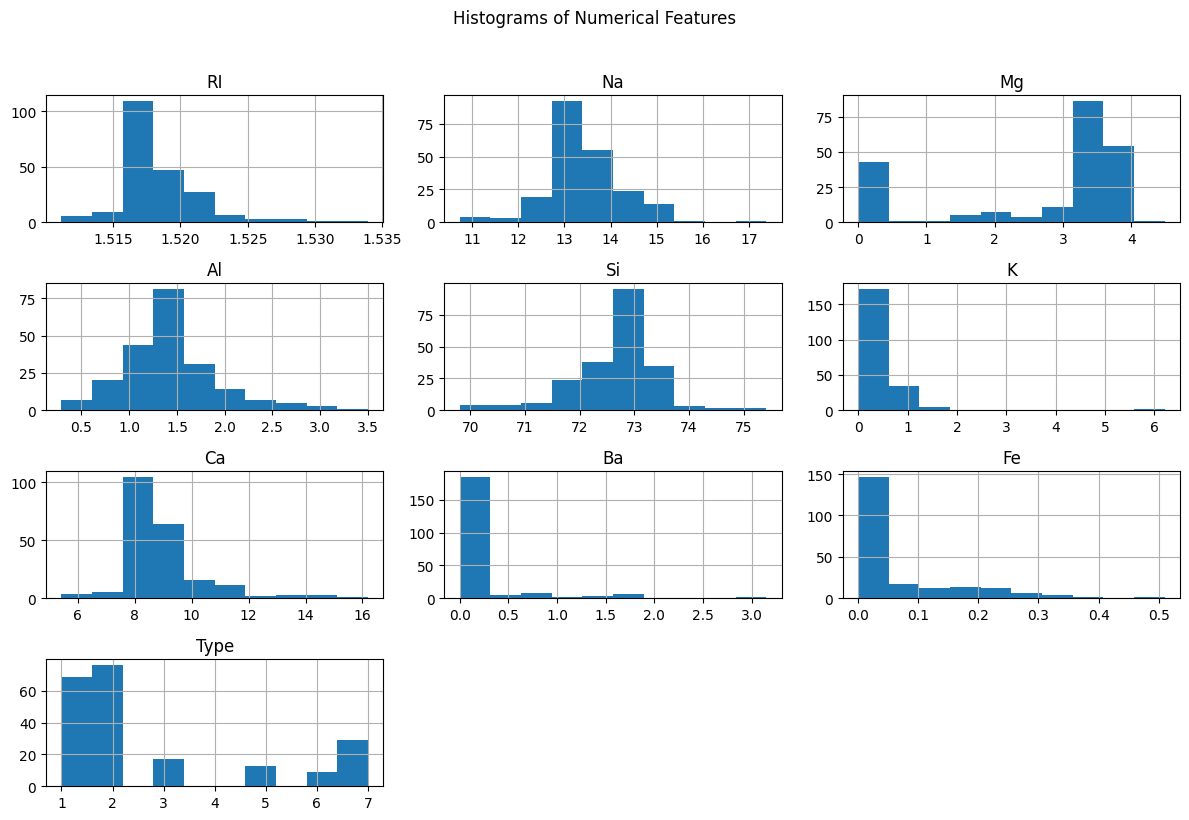

In [15]:
# DATA VISUALIZATION (Histograms for numerical features)
df.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

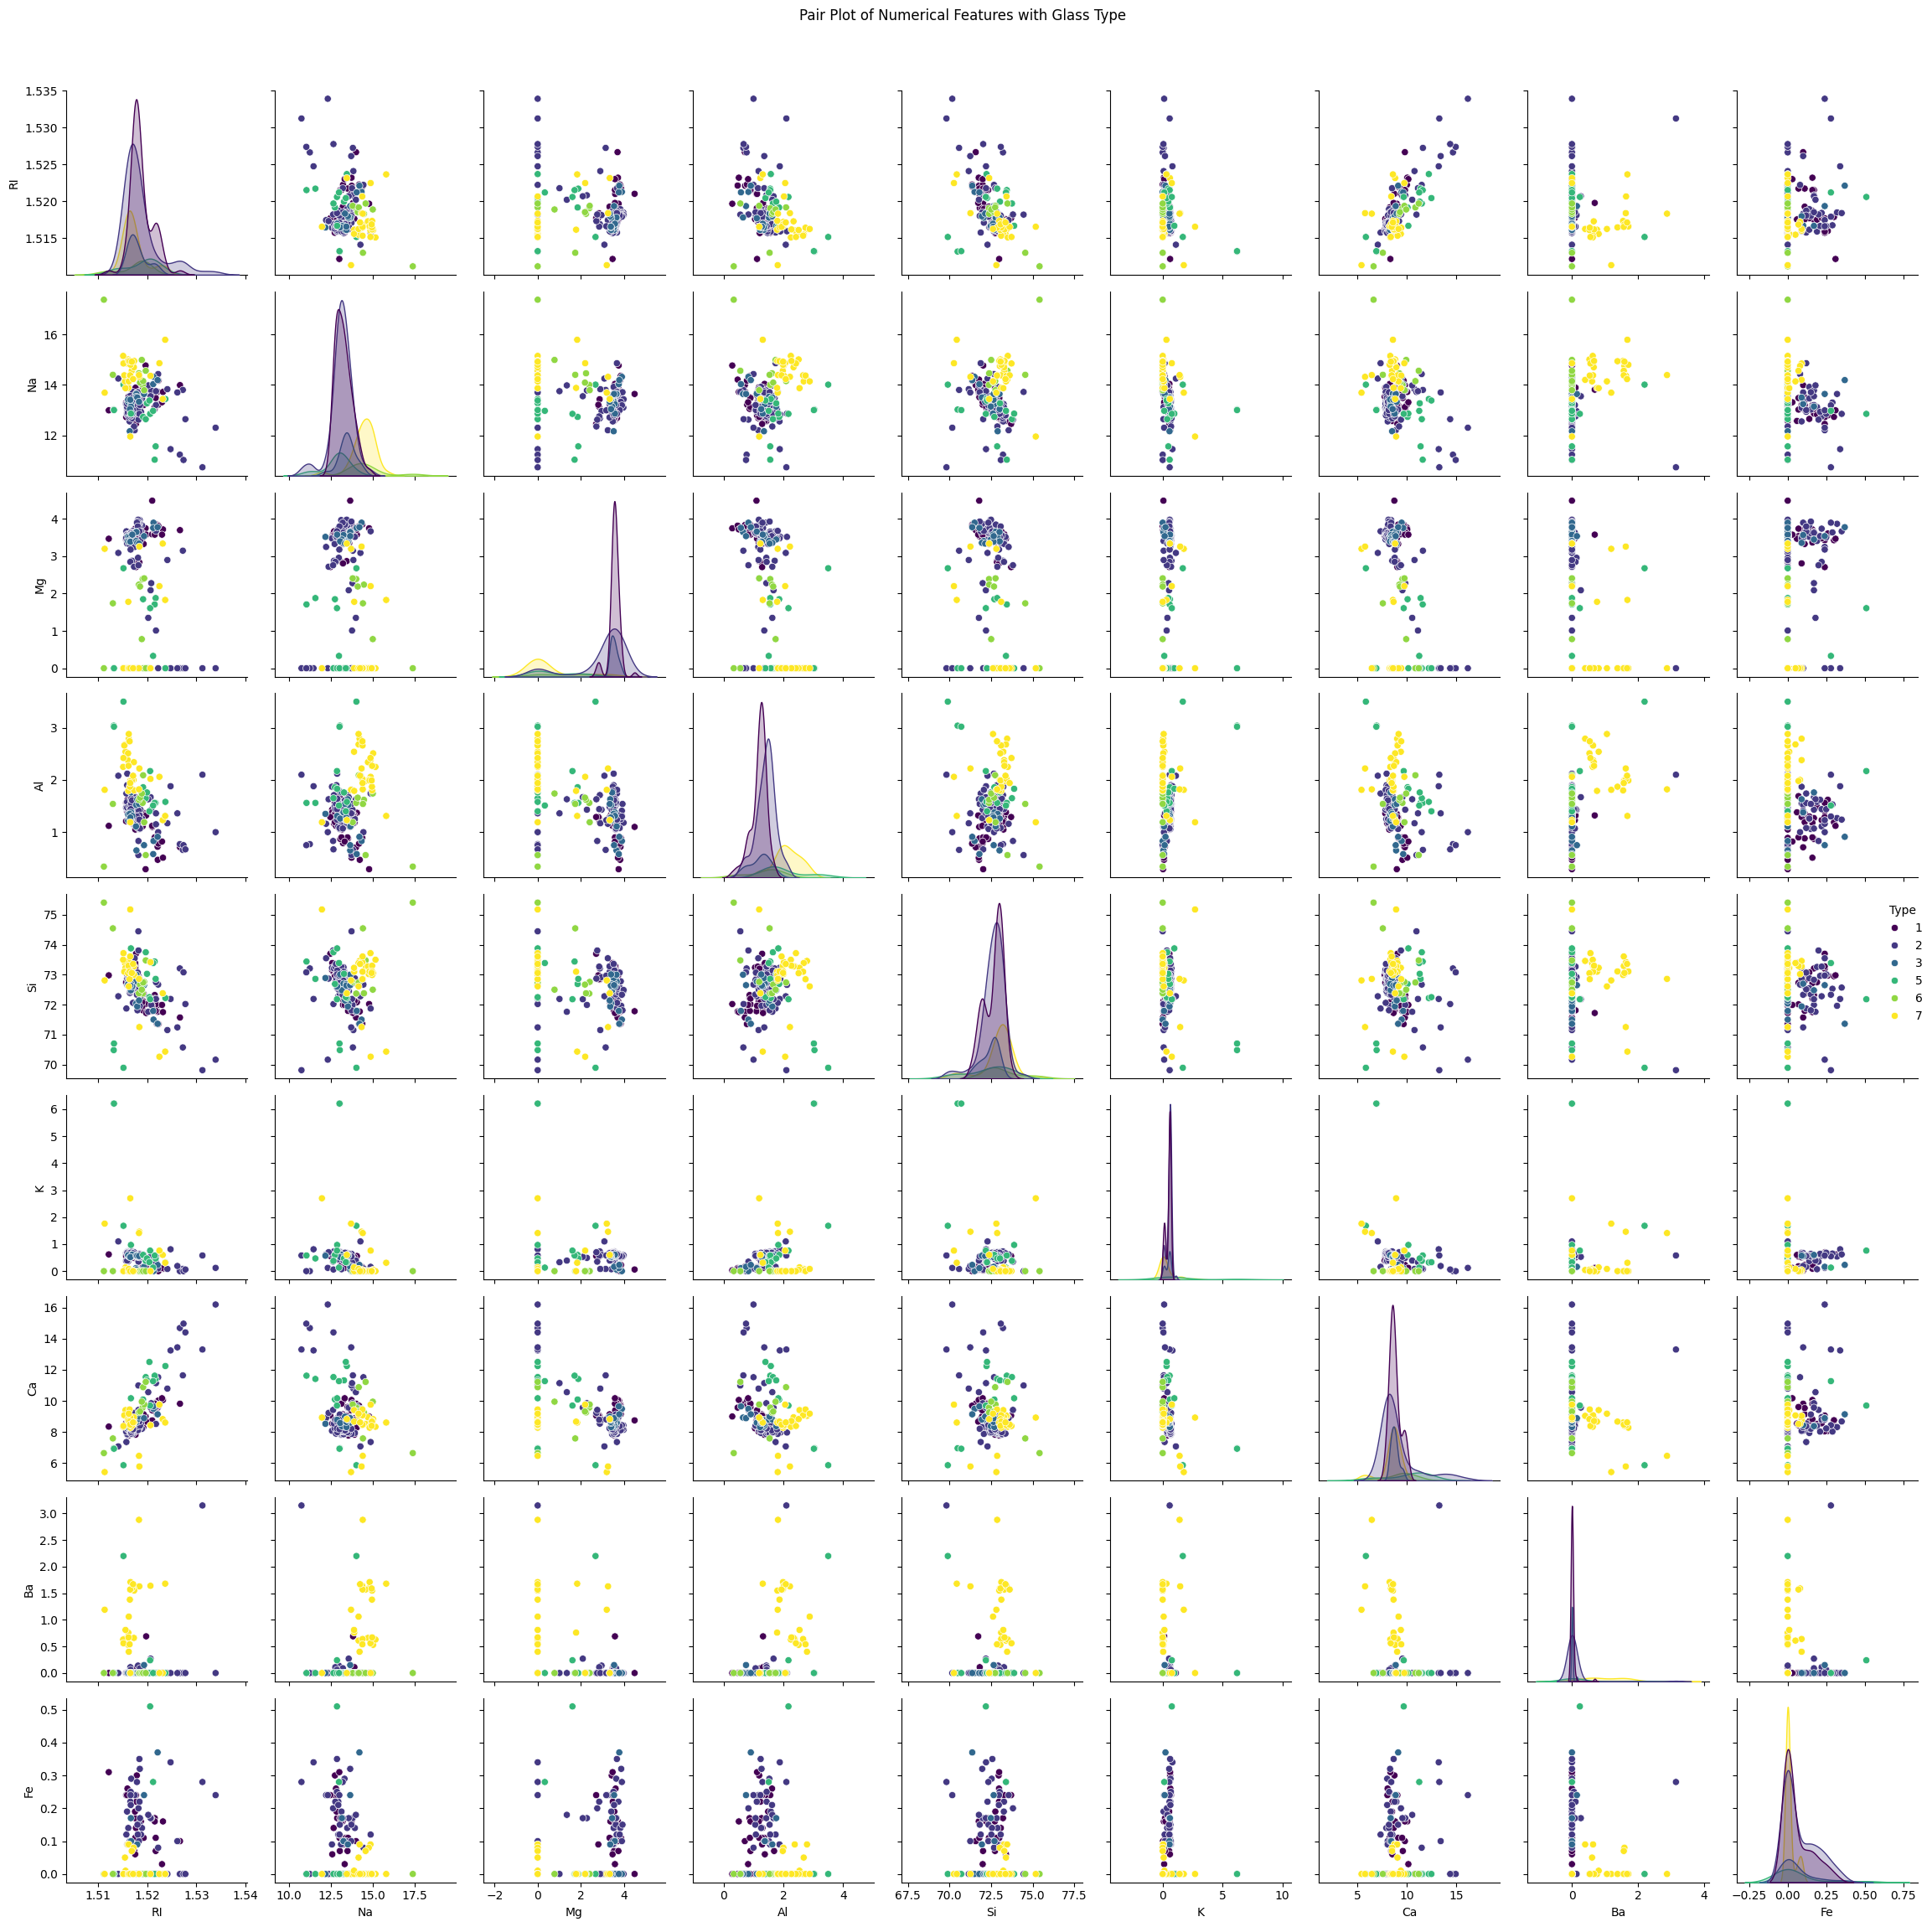

In [16]:
sns.pairplot(df, diag_kind='kde', hue='Type', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features with Glass Type', y=1.02)
plt.tight_layout()
plt.show()

## Data Preprocessing

In [17]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [18]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df.drop(columns=['Type'])
y = df['Type']

# Feature scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling imbalanced data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check the class distribution after resampling
print("Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after resampling:
1    76
2    76
3    76
5    76
6    76
7    76
Name: Type, dtype: int64


## Random Forest Model Implementation

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)
     

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9456521739130435


In [20]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
     


Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.94      0.89      0.92        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.95        92
weighted avg       0.95      0.95      0.95        92



In [21]:
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
     


Confusion Matrix:
[[14  1  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 18]]


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Evaluation Metrics:
Precision: 0.9473128019323671
Recall: 0.9456521739130435
F1-score: 0.9453762062457713


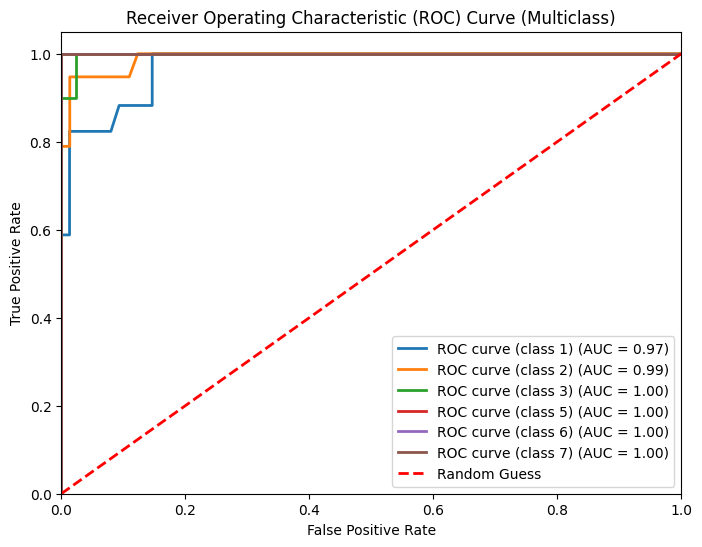

In [24]:
# Assuming `rf_classifier` is your trained RandomForestClassifier
y_probabilities = rf_classifier.predict_proba(X_test)

# Now plot the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))
for i in range(len(rf_classifier.classes_)):
    fpr, tpr, _ = roc_curve(y_test == rf_classifier.classes_[i], y_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (class {rf_classifier.classes_[i]}) (AUC = {roc_auc:0.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--', label='Random Guess')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Multiclass)')
plt.legend(loc="lower right")
plt.show()


## Bagging and Boosting Methods


In [26]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

# Initialize Bagging classifier with Random Forest base estimator
bagging_rf_classifier = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                                          n_estimators=100, random_state=42)

# Train the Bagging classifier
bagging_rf_classifier.fit(X_train, y_train)

# Predict on the test set using Bagging with Random Forest
y_pred_bagging_rf = bagging_rf_classifier.predict(X_test)


# Initialize Gradient Boosting classifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting classifier
gradient_boosting_classifier.fit(X_train, y_train)

# Predict on the test set using Gradient Boosting
y_pred_gradient_boosting = gradient_boosting_classifier.predict(X_test)
     

# Evaluate the Bagging with Random Forest model
accuracy_bagging_rf = accuracy_score(y_test, y_pred_bagging_rf)
print("Accuracy (Bagging with Random Forest):", accuracy_bagging_rf)

# Precision, Recall, and F1-score for Bagging with Random Forest
precision_bagging_rf = precision_score(y_test, y_pred_bagging_rf, average='weighted')
recall_bagging_rf = recall_score(y_test, y_pred_bagging_rf, average='weighted')
f1_bagging_rf = f1_score(y_test, y_pred_bagging_rf, average='weighted')

# Print evaluation metrics for Bagging with Random Forest
print("\nEvaluation Metrics for Bagging with Random Forest:")
print("Precision:", precision_bagging_rf)
print("Recall:", recall_bagging_rf)
print("F1-score:", f1_bagging_rf)
     

Accuracy (Bagging with Random Forest): 0.9456521739130435

Evaluation Metrics for Bagging with Random Forest:
Precision: 0.9473128019323671
Recall: 0.9456521739130435
F1-score: 0.9453762062457713


In [27]:
# Evaluate the Gradient Boosting model
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
print("Accuracy (Gradient Boosting):", accuracy_gradient_boosting)

# Precision, Recall, and F1-score for Gradient Boosting
precision_gradient_boosting = precision_score(y_test, y_pred_gradient_boosting, average='weighted')
recall_gradient_boosting = recall_score(y_test, y_pred_gradient_boosting, average='weighted')
f1_gradient_boosting = f1_score(y_test, y_pred_gradient_boosting, average='weighted')

# Print evaluation metrics for Gradient Boosting
print("\nEvaluation Metrics for Gradient Boosting:")
print("Precision:", precision_gradient_boosting)
print("Recall:", recall_gradient_boosting)
print("F1-score:", f1_gradient_boosting)

Accuracy (Gradient Boosting): 0.9239130434782609

Evaluation Metrics for Gradient Boosting:
Precision: 0.9312116778149387
Recall: 0.9239130434782609
F1-score: 0.9242856142667107


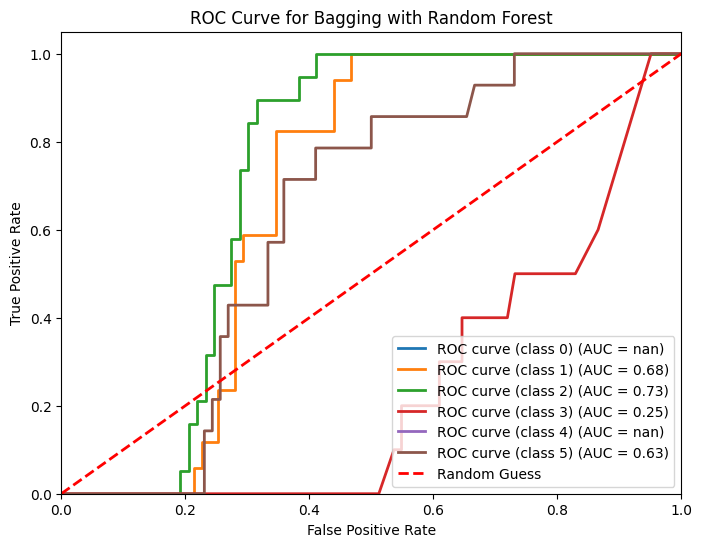

In [29]:
# Assuming `bagging_rf_classifier` is your trained Bagging classifier with Random Forest
y_probabilities_bagging_rf = bagging_rf_classifier.predict_proba(X_test)

# Proceed with ROC curve calculation
fpr_bagging_rf = dict()
tpr_bagging_rf = dict()
roc_auc_bagging_rf = dict()

for i in range(len(np.unique(y_test))):
    fpr_bagging_rf[i], tpr_bagging_rf[i], _ = roc_curve(y_test_one_hot[:, i], y_probabilities_bagging_rf[:, i])
    roc_auc_bagging_rf[i] = auc(fpr_bagging_rf[i], tpr_bagging_rf[i])

# Plot ROC curve for Bagging with Random Forest
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr_bagging_rf[i], tpr_bagging_rf[i], lw=2, label=f'ROC curve (class {i}) (AUC = {roc_auc_bagging_rf[i]:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--', label='Random Guess')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bagging with Random Forest')
plt.legend(loc="lower right")
plt.show()


In [32]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

# Initialize Bagging classifier with Random Forest base estimator
bagging_rf_classifier = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                                          n_estimators=100, random_state=42)

# Train the Bagging classifier
bagging_rf_classifier.fit(X_train, y_train)

# Predict on the test set using Bagging with Random Forest
y_pred_bagging_rf = bagging_rf_classifier.predict(X_test)


# Initialize Gradient Boosting classifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting classifier
gradient_boosting_classifier.fit(X_train, y_train)

# Predict on the test set using Gradient Boosting
y_pred_gradient_boosting = gradient_boosting_classifier.predict(X_test)
     

# Evaluate the Bagging with Random Forest model
accuracy_bagging_rf = accuracy_score(y_test, y_pred_bagging_rf)
print("Accuracy (Bagging with Random Forest):", accuracy_bagging_rf)

# Precision, Recall, and F1-score for Bagging with Random Forest
precision_bagging_rf = precision_score(y_test, y_pred_bagging_rf, average='weighted')
recall_bagging_rf = recall_score(y_test, y_pred_bagging_rf, average='weighted')
f1_bagging_rf = f1_score(y_test, y_pred_bagging_rf, average='weighted')

# Print evaluation metrics for Bagging with Random Forest
print("\nEvaluation Metrics for Bagging with Random Forest:")
print("Precision:", precision_bagging_rf)
print("Recall:", recall_bagging_rf)
print("F1-score:", f1_bagging_rf)


Accuracy (Bagging with Random Forest): 0.9456521739130435

Evaluation Metrics for Bagging with Random Forest:
Precision: 0.9473128019323671
Recall: 0.9456521739130435
F1-score: 0.9453762062457713
